# Digit Recognizer

### Importing Libraries

In [15]:
import numpy as np
import pandas as pd

import tensorflow as tf
import tensorflow.keras as ks

from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint


import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

### Reading the train and test data

In [2]:
train_df = pd.read_csv('../input/digit-recognizer/train.csv')
print(f'the shape of training data is {train_df.shape}')
test_df = pd.read_csv('../input/digit-recognizer/test.csv')
print(f'the shape of test data is {test_df.shape}')
train_df.sample(3)

the shape of training data is (42000, 785)
the shape of test data is (28000, 784)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
22932,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13460,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5261,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Reshaping the images and spliting the training data into train and validation data

In [3]:
train_labels = train_df['label']
train_images = train_df.drop(['label'], axis=1)


train_images = np.array(train_images).reshape(42000, 28, 28, 1)
test_images = np.array(test_df).reshape(28000, 28, 28, 1)

training_images, validation_images, training_labels, validation_labels = train_test_split(train_images,
                                                                                          train_labels, 
                                                                                         random_state=0, 
                                                                                         test_size=0.1)
train_labels = to_categorical(training_labels)
validation_labels = to_categorical(validation_labels)

### Augmentation 

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10, 
    shear_range=.1, 
    width_shift_range=0.05, 
    height_shift_range=0.05,
    zoom_range=0.05,
    horizontal_flip=False, 
    fill_mode='nearest'
)

train_generator = train_datagen.flow(training_images, train_labels, batch_size=100)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow(validation_images, validation_labels, batch_size=10)

### Model

In [5]:
model = ks.models.Sequential()

model.add(ks.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.MaxPooling2D((2, 2)))
model.add(ks.layers.Dropout(0.2))

model.add(ks.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.MaxPooling2D((2, 2)))
model.add(ks.layers.Dropout(0.2))

model.add(ks.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.MaxPooling2D((2, 2)))
model.add(ks.layers.Dropout(0.2))

model.add(ks.layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.MaxPooling2D((2, 2)))
model.add(ks.layers.Dropout(0.2))


model.add(ks.layers.Flatten())

model.add(ks.layers.Dense(1024, activation='relu'))
model.add(ks.layers.Dense(512, activation='relu'))
model.add(ks.layers.Dense(256, activation='relu'))

model.add(ks.layers.Dense(10, activation='softmax'))

model.compile(optimizer=ks.optimizers.Adam(lr=1e-3),
              loss='categorical_crossentropy',
              metrics=['acc'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0

In [7]:
lr_reduction = ReduceLROnPlateau(monitor = 'val_acc', factor = 0.5, min_lr = 1e-6)

checkpoint = ModelCheckpoint('./trainedModel.hdf5',monitor = 'val_acc', mode = "max", save_best_model = True)

In [8]:
history = model.fit_generator(train_generator, 
                    epochs=50, validation_data=test_generator, 
                   callbacks=[lr_reduction, checkpoint])

Epoch 1/50


/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


378/378 [==============================] - 17s 35ms/step - loss: 0.6611 - acc: 0.7777 - val_loss: 1.3743 - val_acc: 0.5331
Epoch 2/50
378/378 [==============================] - 12s 33ms/step - loss: 0.1073 - acc: 0.9685 - val_loss: 0.0720 - val_acc: 0.9781
Epoch 3/50
378/378 [==============================] - 13s 34ms/step - loss: 0.0790 - acc: 0.9768 - val_loss: 0.0418 - val_acc: 0.9874
Epoch 4/50
378/378 [==============================] - 13s 33ms/step - loss: 0.0685 - acc: 0.9805 - val_loss: 0.0343 - val_acc: 0.9902
Epoch 5/50
378/378 [==============================] - 13s 34ms/step - loss: 0.0619 - acc: 0.9809 - val_loss: 0.0503 - val_acc: 0.9886
Epoch 6/50
378/378 [==============================] - 12s 33ms/step - loss: 0.0545 - acc: 0.9851 - val_loss: 0.0331 - val_acc: 0.9917
Epoch 7/50
378/378 [==============================] - 12s 33ms/step - loss: 0.0520 - acc: 0.9842 - val_loss: 0.0433 - val_acc: 0.9890
Epoch 8/50
378/378 [==============================] - 13s 34ms/step - los

### Validating model using Accuracy and Loss chart 

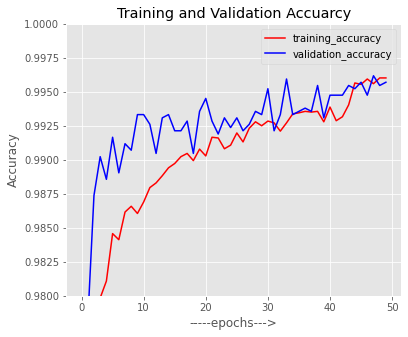

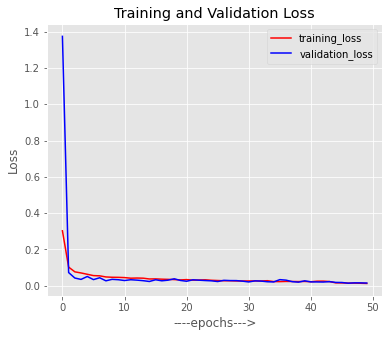

In [9]:
plt.style.use('ggplot')

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(6, 5))

plt.plot(epochs, acc, 'r', label='training_accuracy')
plt.plot(epochs, val_acc, 'b', label='validation_accuracy')
plt.ylim(0.98, 1)
plt.title('Training and Validation Accuarcy')
plt.xlabel('-----epochs--->')
plt.ylabel('Accuracy')
plt.legend()

plt.figure(figsize=(6, 5))

plt.plot(epochs, loss, 'r', label='training_loss')
plt.plot(epochs, val_loss, 'b', label='validation_loss')
plt.title('Training and Validation Loss')
plt.xlabel('----epochs--->')
plt.ylabel('Loss')
plt.legend()

plt.show()